<a href="https://colab.research.google.com/github/Arunim10/House-Price-Prediction-Machine-Learning/blob/main/advanced_house_price_prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/House Price Prediction/train.csv")
df.shape
df_test = pd.read_csv("/content/drive/MyDrive/House Price Prediction/train.csv")
train_test_df = df.append(df_test)
train_test_df.shape

(2920, 81)

# Order of things we have to do in data analaysis
### 1. Missing Values
### 2. Numerical Variables
### 3. Distribution of numerical variables
### 4. Categorical variables
### 5. Cardinality of Category variables
### 6. Outliers
### 7. relation between independent and dependent features(SalePrice)

# Missing Values

In [ ]:
features_nan = [col for col in df.columns if df[col].isnull().sum()>0]
for feature in features_nan:
  print(feature," : ", np.round(df[feature].isnull().mean(),4) * 100 ," % missing values")

LotFrontage  :  17.740000000000002  % missing values
Alley  :  93.77  % missing values
MasVnrType  :  0.5499999999999999  % missing values
MasVnrArea  :  0.5499999999999999  % missing values
BsmtQual  :  2.53  % missing values
BsmtCond  :  2.53  % missing values
BsmtExposure  :  2.6  % missing values
BsmtFinType1  :  2.53  % missing values
BsmtFinType2  :  2.6  % missing values
Electrical  :  0.06999999999999999  % missing values
FireplaceQu  :  47.260000000000005  % missing values
GarageType  :  5.55  % missing values
GarageYrBlt  :  5.55  % missing values
GarageFinish  :  5.55  % missing values
GarageQual  :  5.55  % missing values
GarageCond  :  5.55  % missing values
PoolQC  :  99.52  % missing values
Fence  :  80.75  % missing values
MiscFeature  :  96.3  % missing values


## Since there are many missing values , we need to find the relationship between missing values and SalePrice

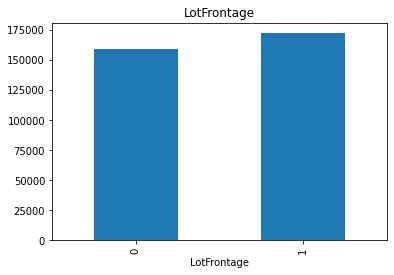

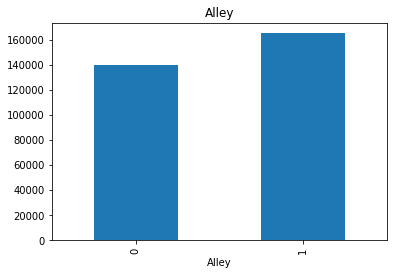

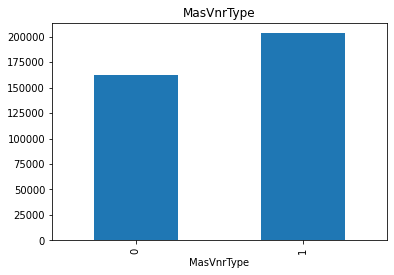

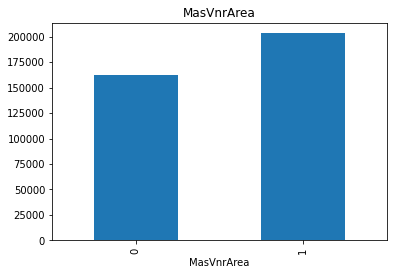

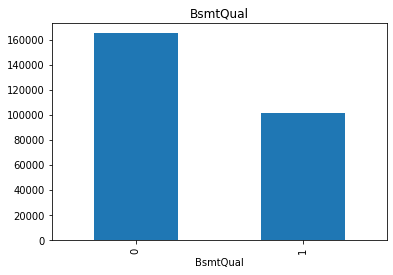

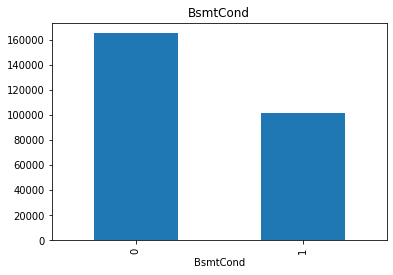

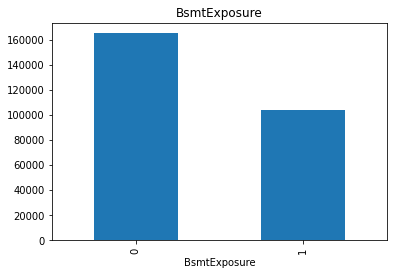

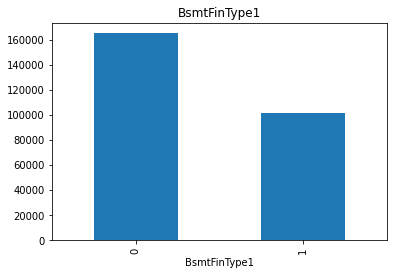

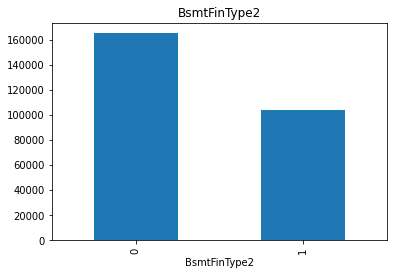

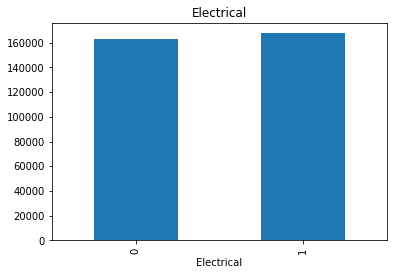

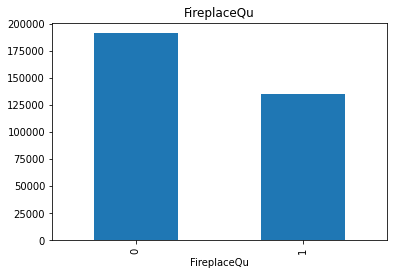

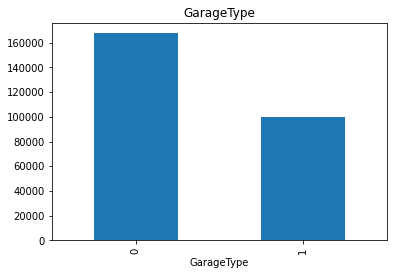

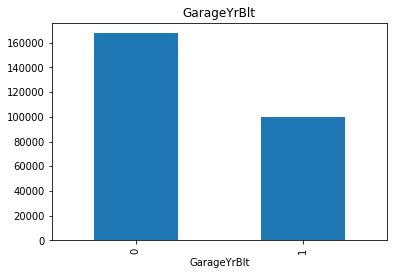

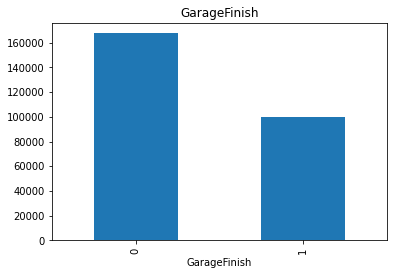

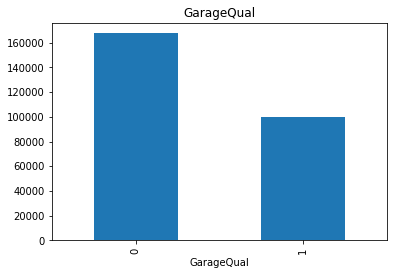

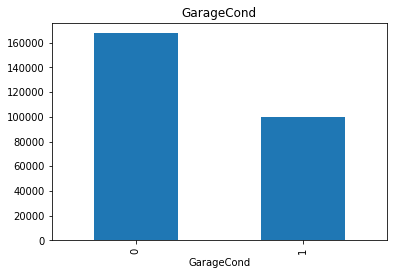

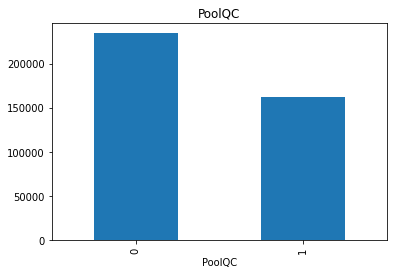

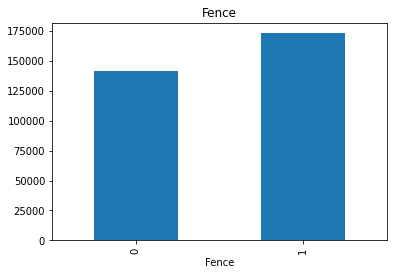

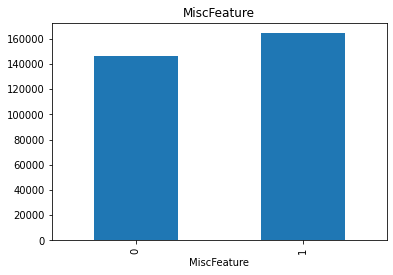

In [ ]:
for feature in features_nan:
  data = df.copy()
  data[feature] = np.where(data[feature].isnull(),1,0) # If the data is missing , replacing it with nan ,else with 1

  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

## The SalePrices corresponding to the nan values are generally high and thus it seems that relation between nan and SalePrice is good

In [ ]:
df.Id.nunique()

1460

# Numerical Variables

In [ ]:
numeric_features = df.select_dtypes(include=np.number)
print("Length of numerical features is ",len(numeric_features))
numeric_features.head()

Length of numerical features is  1460


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Handling Date-Time Features 

In [ ]:
# Storing all the year columns in a list
year_cols = [col for col in numeric_features.columns if 'Yr' in col or 'Year' in col]
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
numeric_features[year_cols].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


Text(0.5, 1.0, 'SalePrice vs YearSold')

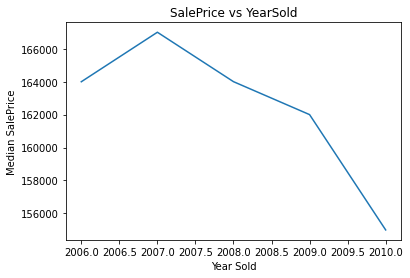

In [ ]:
 # Lets see if there is a relation between the year sold and SalePrice

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median SalePrice")
plt.title("SalePrice vs YearSold")

### We can see here that the SalePrice is decreasing as the sold year of the house is increasing 

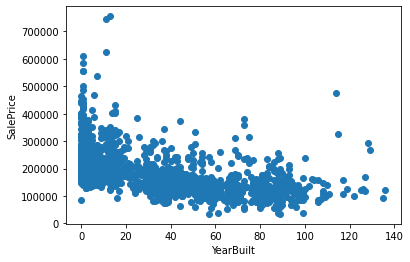

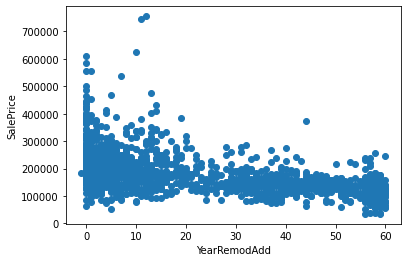

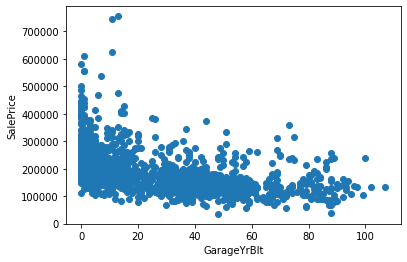

In [ ]:
# Now here we are plotting scatterplots , where in x axis will be having years passed for a particular year column with respect to the YrSold column 
for feature in year_cols:
    if feature!='YrSold':
      data = df.copy()
      data[feature] = data['YrSold'] - data[feature]

      plt.scatter(data[feature],data['SalePrice'])
      plt.xlabel(feature)
      plt.ylabel("SalePrice")
      plt.show()

In [ ]:
numeric_features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
for feature in numeric_features.columns:
  print(feature," : ",df[feature].nunique())

Id  :  1460
MSSubClass  :  15
LotFrontage  :  110
LotArea  :  1073
OverallQual  :  10
OverallCond  :  9
YearBuilt  :  112
YearRemodAdd  :  61
MasVnrArea  :  327
BsmtFinSF1  :  637
BsmtFinSF2  :  144
BsmtUnfSF  :  780
TotalBsmtSF  :  721
1stFlrSF  :  753
2ndFlrSF  :  417
LowQualFinSF  :  24
GrLivArea  :  861
BsmtFullBath  :  4
BsmtHalfBath  :  3
FullBath  :  4
HalfBath  :  3
BedroomAbvGr  :  8
KitchenAbvGr  :  4
TotRmsAbvGrd  :  12
Fireplaces  :  4
GarageYrBlt  :  97
GarageCars  :  5
GarageArea  :  441
WoodDeckSF  :  274
OpenPorchSF  :  202
EnclosedPorch  :  120
3SsnPorch  :  20
ScreenPorch  :  76
PoolArea  :  8
MiscVal  :  21
MoSold  :  12
YrSold  :  5
SalePrice  :  663


## Discrete Columns 

In [ ]:
# Here , we are grouping all those columns as discrete columns which have number of unique values < 25
discrete_cols = [col for col in numeric_features if df[col].nunique()<25 and col not in year_cols+['Id']]
discrete_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

### Relationship between discrete features and SalePrice

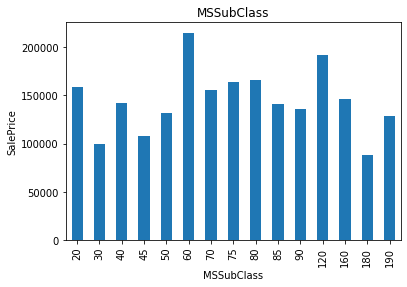

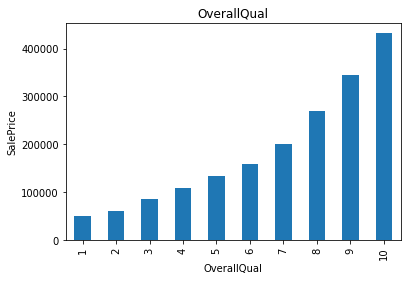

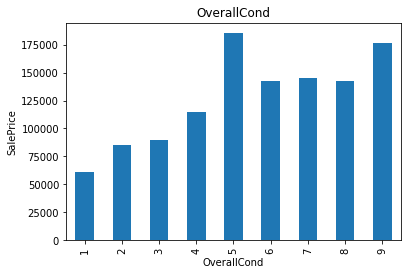

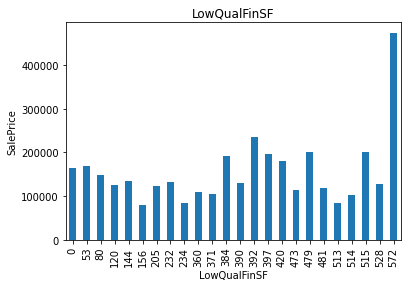

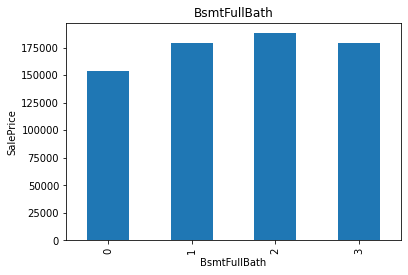

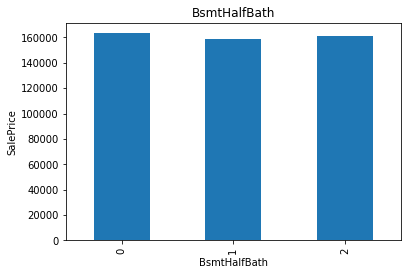

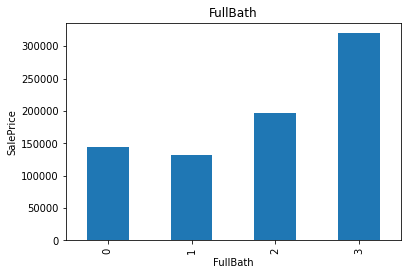

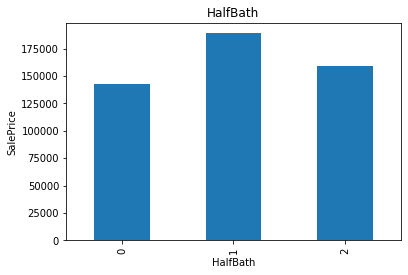

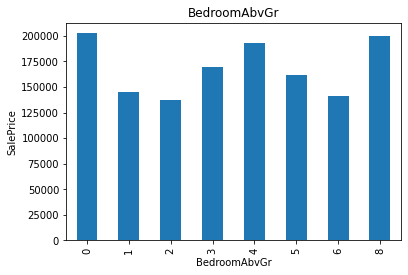

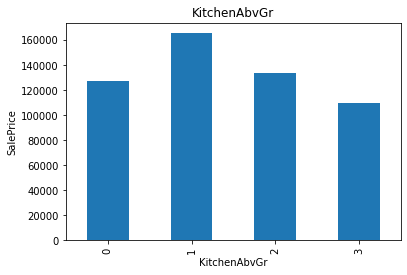

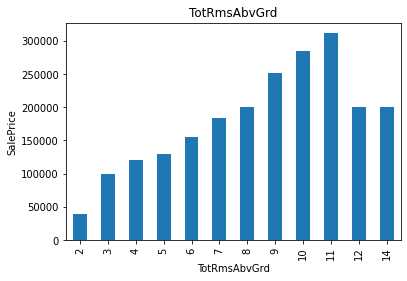

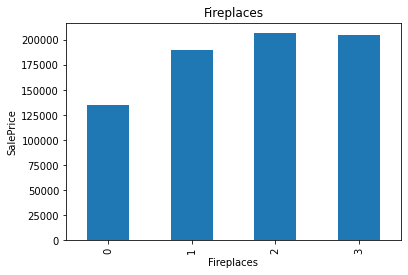

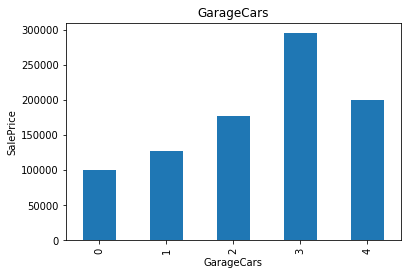

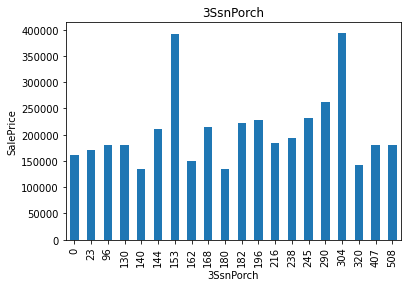

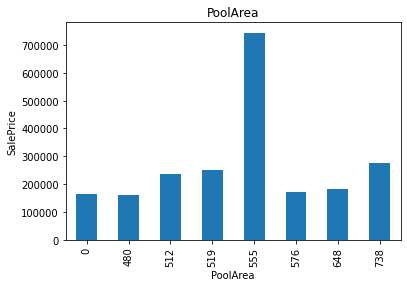

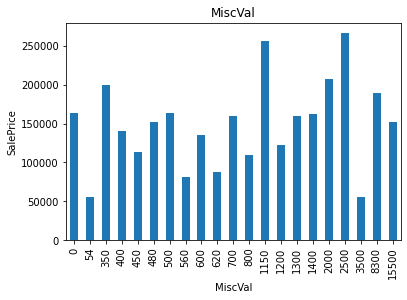

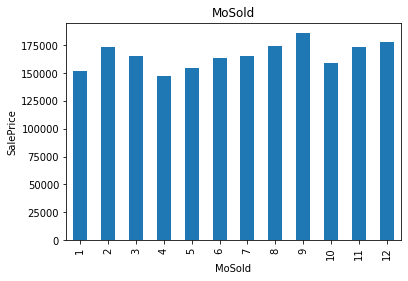

In [ ]:
for feature in discrete_cols:
  data = df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

# Continuous Columns

In [ ]:
continuous_cols = [feature for feature in numeric_features if feature not in discrete_cols+['Id'] ]
continuous_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'YrSold',
 'SalePrice']

## Finding continuous distributions for continuous variables

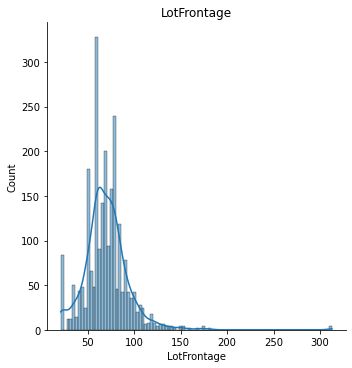

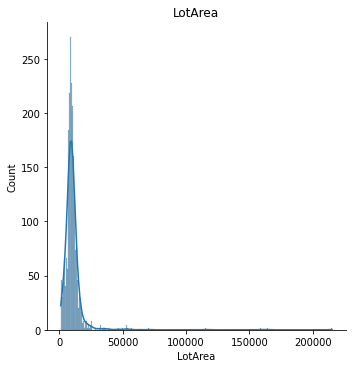

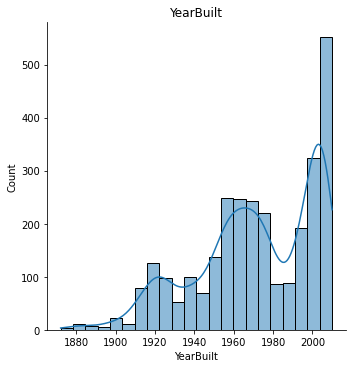

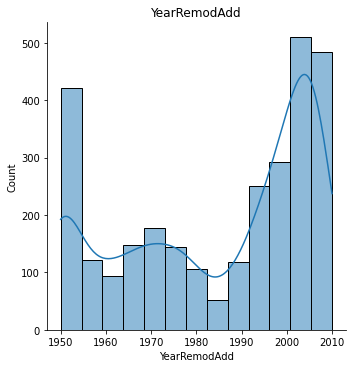

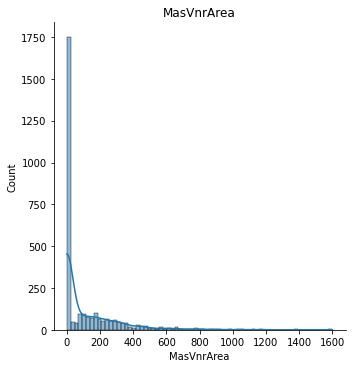

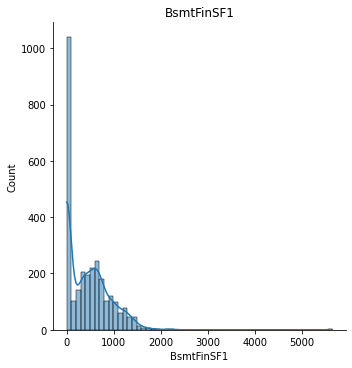

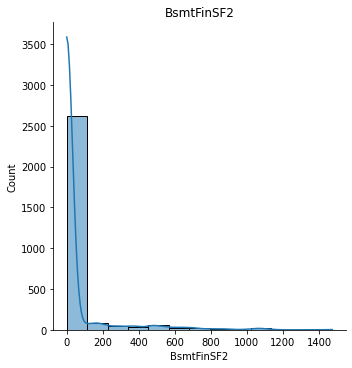

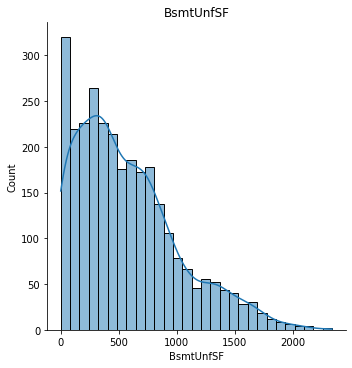

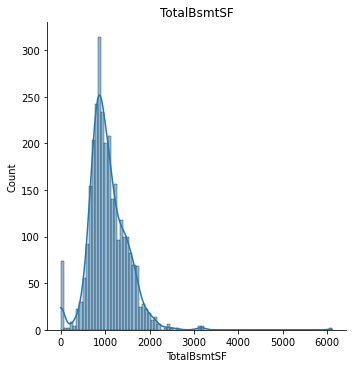

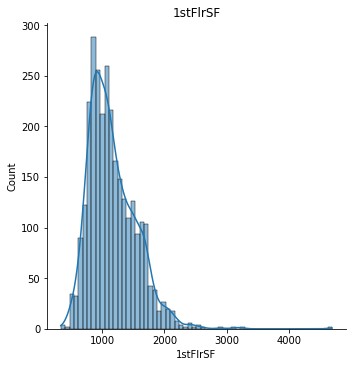

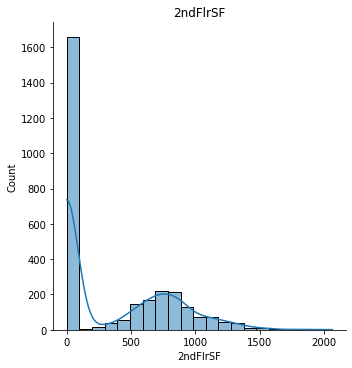

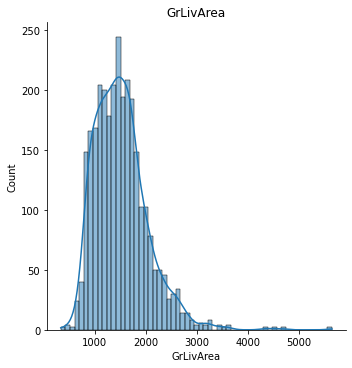

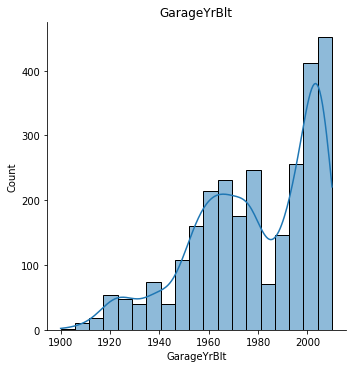

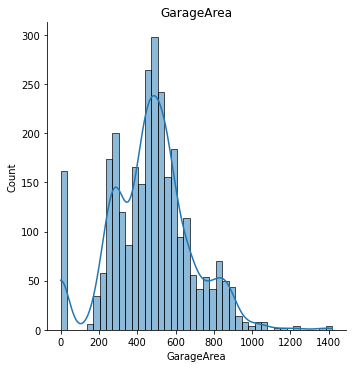

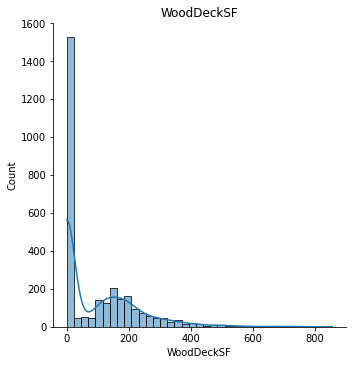

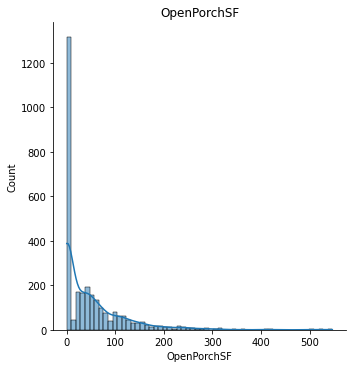

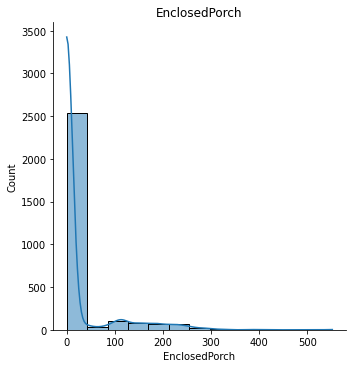

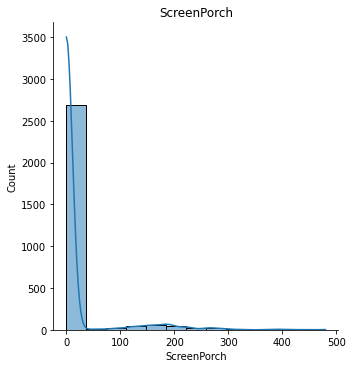

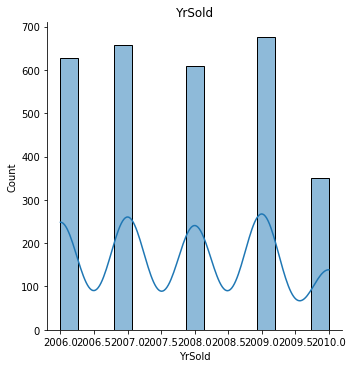

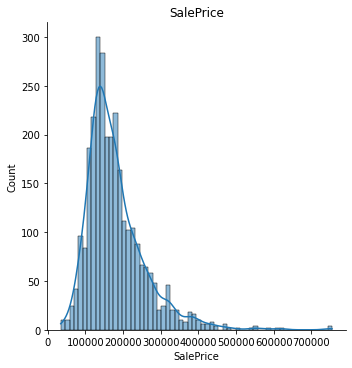

In [ ]:
for feature in continuous_cols:
  data = train_test_df.copy()
  sns.displot(data[feature],kde=True)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

### Here , we can see that the datas are very skewed , so we need to do some transformations here , we will go for log tranformation

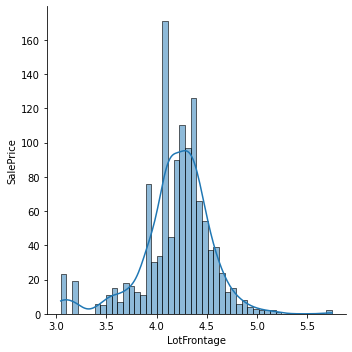

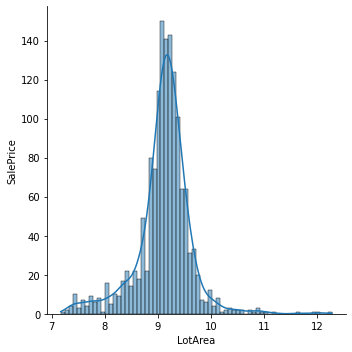

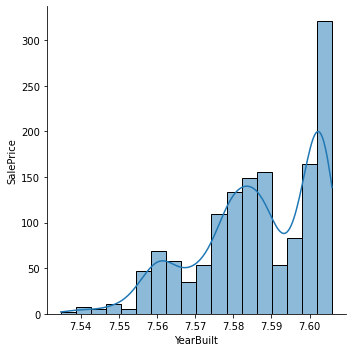

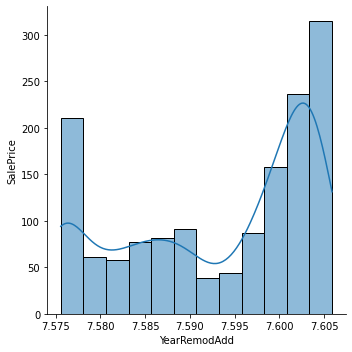

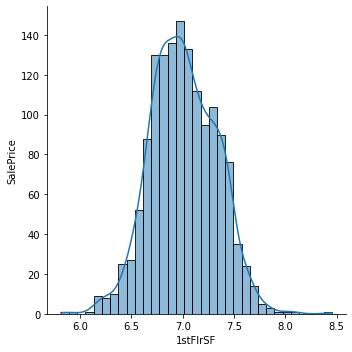

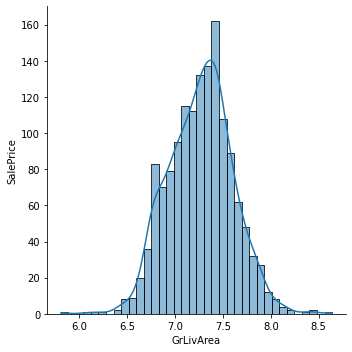

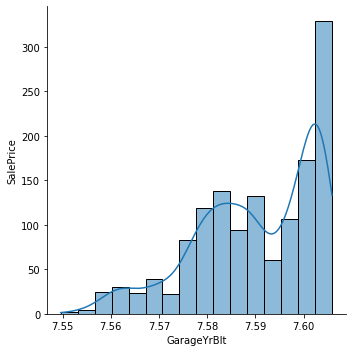

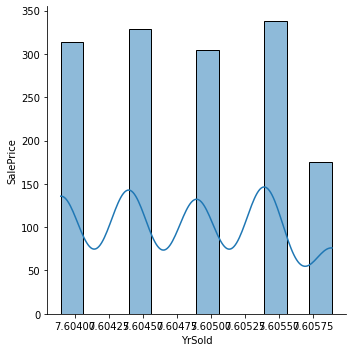

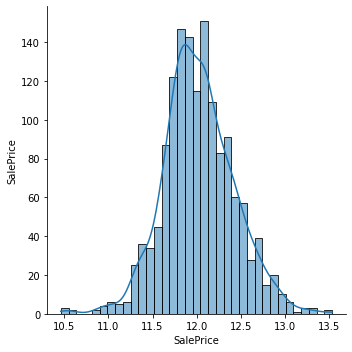

In [ ]:
## Logarithmic transformation

for feature in continuous_cols:
  data = df.copy()
  if 0 in data[feature].unique(): # avoiding the columns having zero in their datas 
    pass
  else:
    data[feature] = np.log(data[feature])
    data['SalePRice'] = np.log(data['SalePrice'])
    sns.displot(data[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

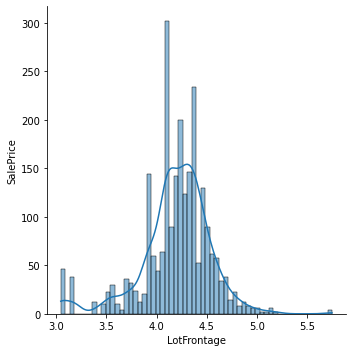

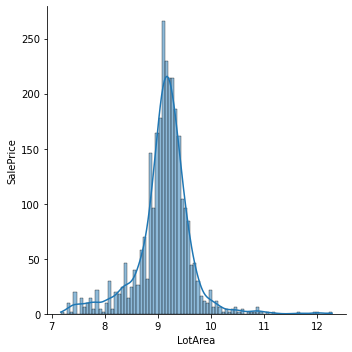

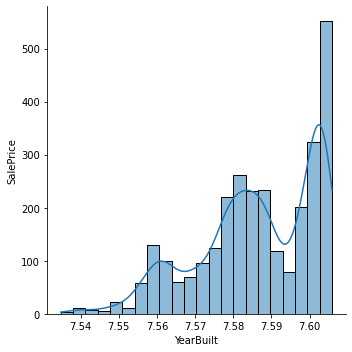

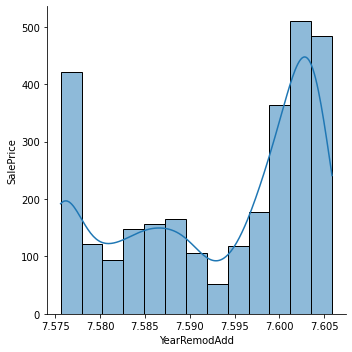

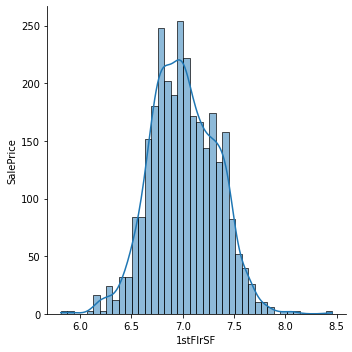

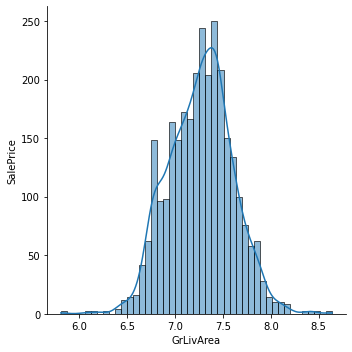

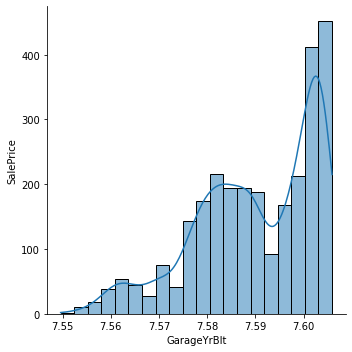

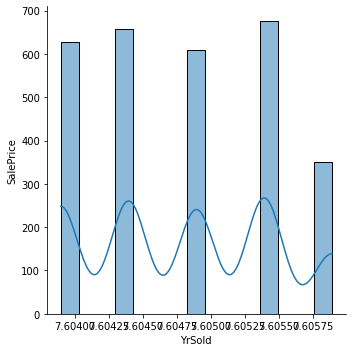

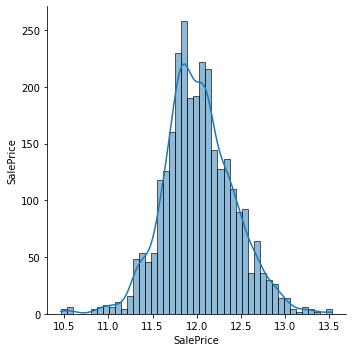

In [ ]:
## Logarithmic transformation

for feature in continuous_cols:
  data = train_test_df.copy()
  if 0 in data[feature].unique(): # avoiding the columns having zero in their datas 
    pass
  else:
    data[feature] = np.log(data[feature])
    data['SalePRice'] = np.log(data['SalePrice'])
    sns.displot(data[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

### Here , we can see after applying log transformation , data is skewed.

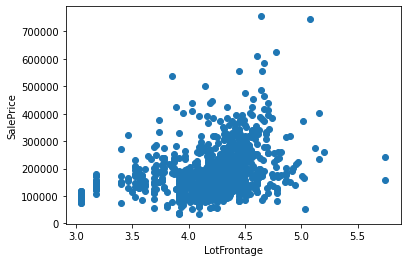

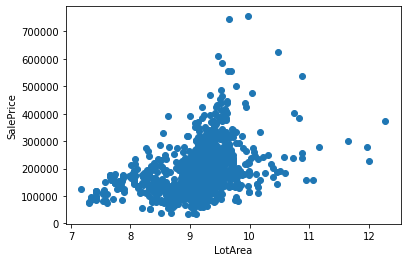

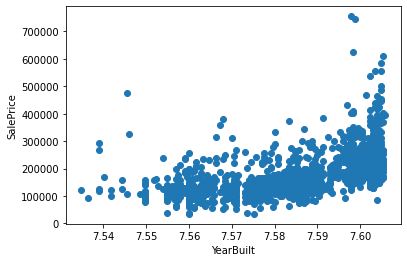

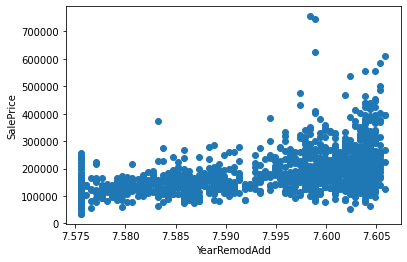

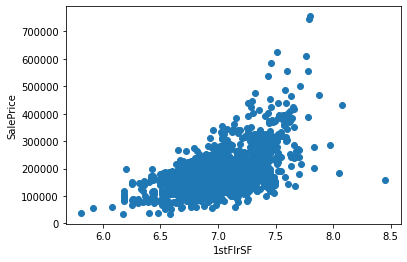

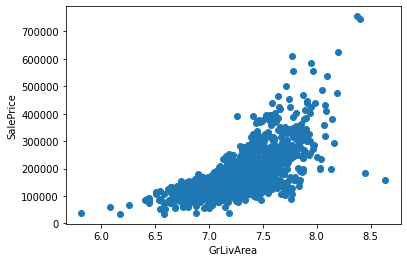

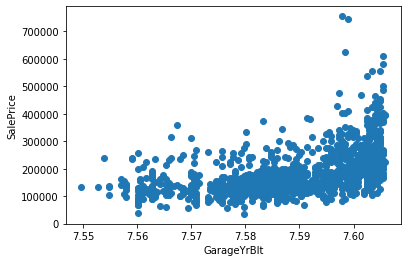

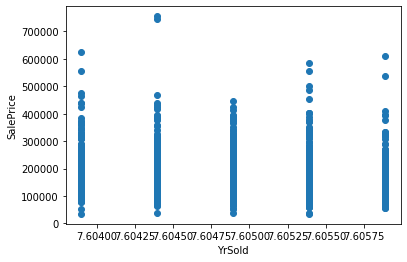

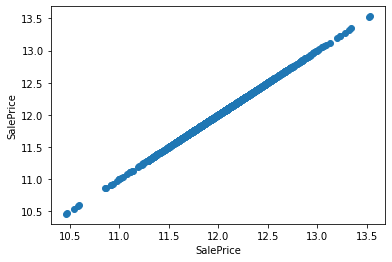

In [ ]:
## Logarithmic transformation

for feature in continuous_cols:
  data = df.copy()
  if 0 in data[feature].unique(): # avoiding the columns having zero in their datas 
    pass
  else:
    data[feature] = np.log(data[feature])
    data['SalePRice'] = np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

## Outliers

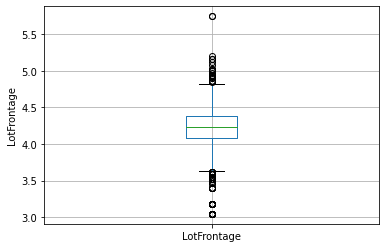

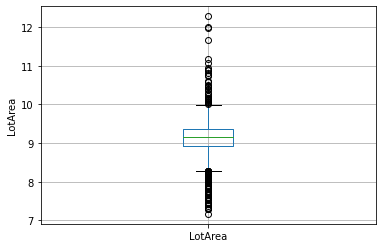

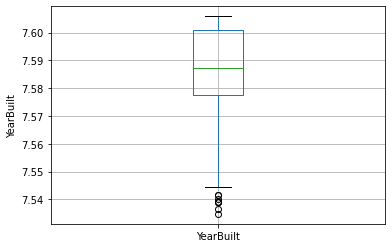

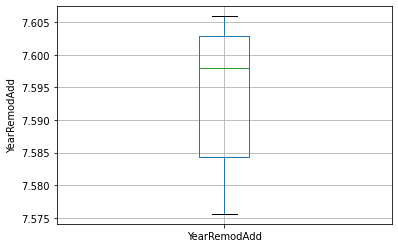

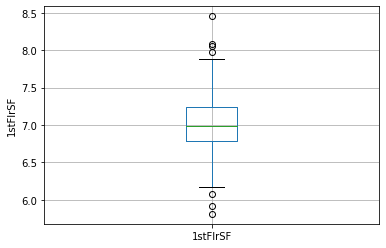

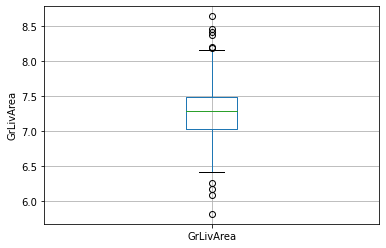

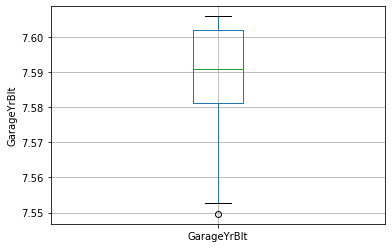

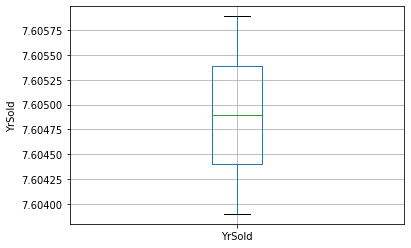

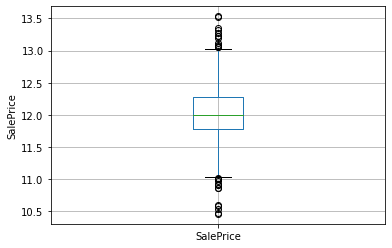

In [ ]:
for feature in continuous_cols:
  data = df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    # plt.title(feature)
    plt.show()

## We can see many outliers here 

# Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include="object")
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# find unique categories

for feature in categorical_features:
  print(feature," : ",df[feature].nunique()," labels")

MSZoning  :  5  labels
Street  :  2  labels
Alley  :  2  labels
LotShape  :  4  labels
LandContour  :  4  labels
Utilities  :  2  labels
LotConfig  :  5  labels
LandSlope  :  3  labels
Neighborhood  :  25  labels
Condition1  :  9  labels
Condition2  :  8  labels
BldgType  :  5  labels
HouseStyle  :  8  labels
RoofStyle  :  6  labels
RoofMatl  :  8  labels
Exterior1st  :  15  labels
Exterior2nd  :  16  labels
MasVnrType  :  4  labels
ExterQual  :  4  labels
ExterCond  :  5  labels
Foundation  :  6  labels
BsmtQual  :  4  labels
BsmtCond  :  4  labels
BsmtExposure  :  4  labels
BsmtFinType1  :  6  labels
BsmtFinType2  :  6  labels
Heating  :  6  labels
HeatingQC  :  5  labels
CentralAir  :  2  labels
Electrical  :  5  labels
KitchenQual  :  4  labels
Functional  :  7  labels
FireplaceQu  :  5  labels
GarageType  :  6  labels
GarageFinish  :  3  labels
GarageQual  :  5  labels
GarageCond  :  5  labels
PavedDrive  :  3  labels
PoolQC  :  3  labels
Fence  :  4  labels
MiscFeature  :  4  lab

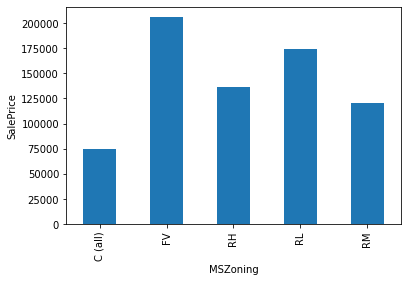

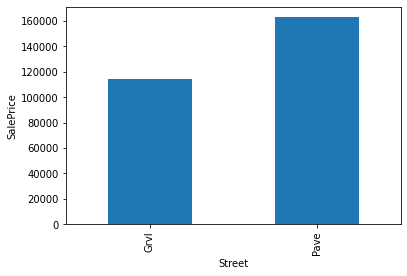

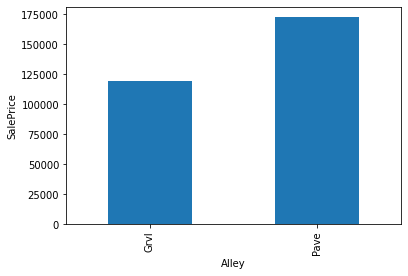

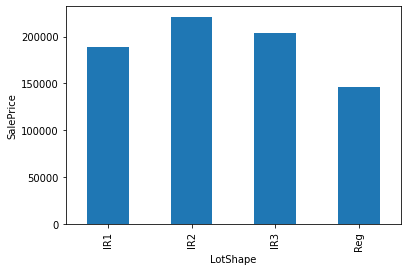

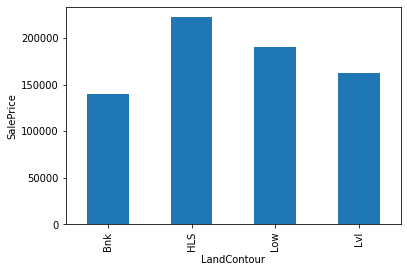

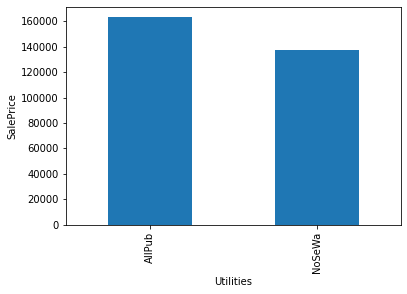

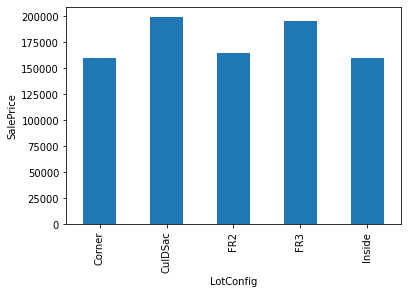

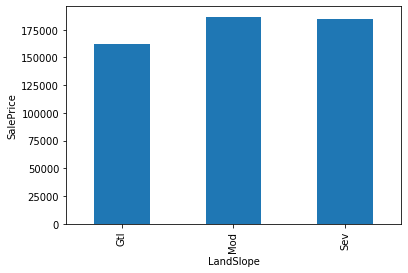

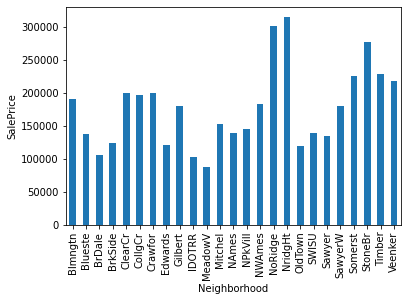

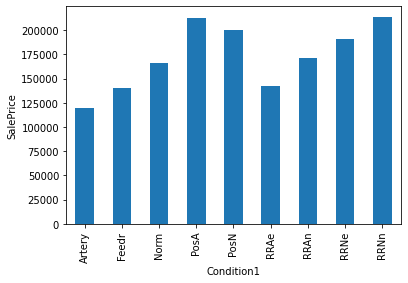

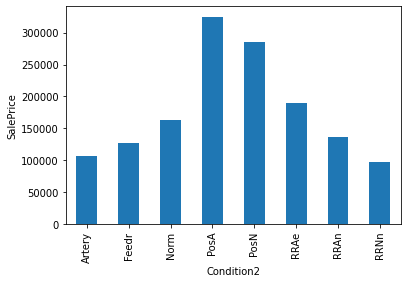

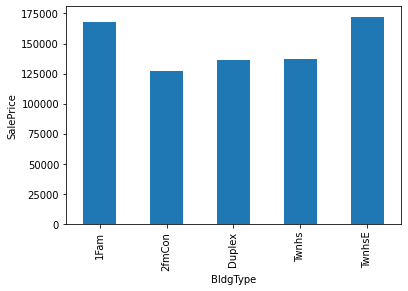

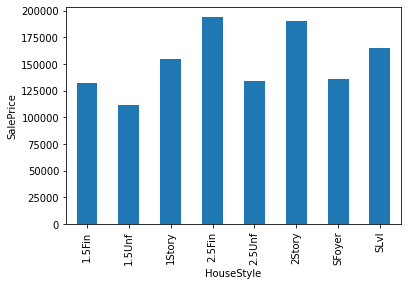

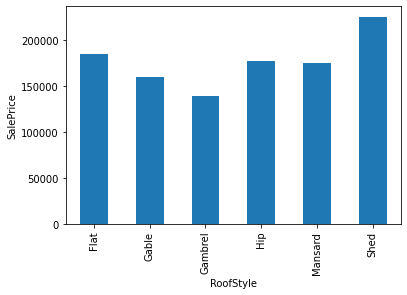

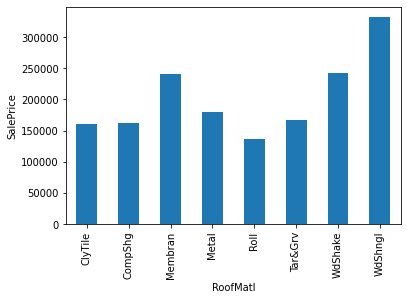

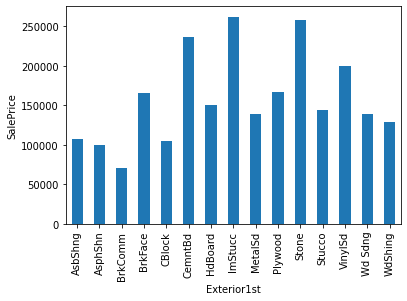

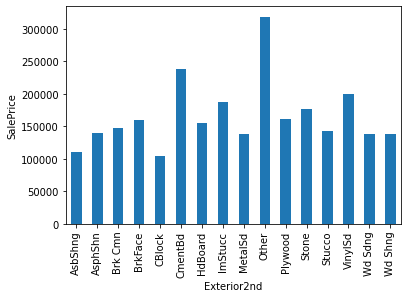

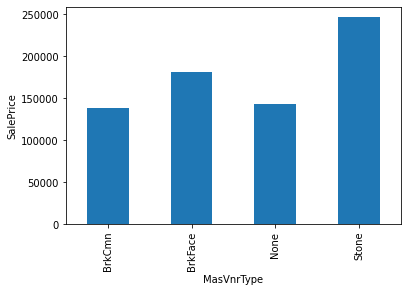

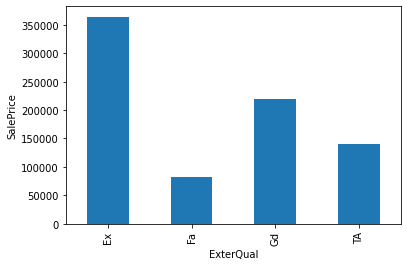

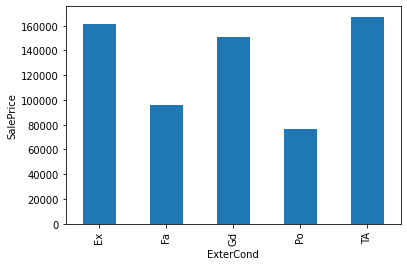

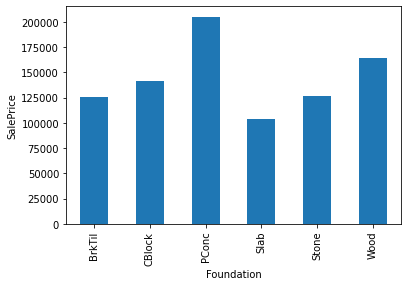

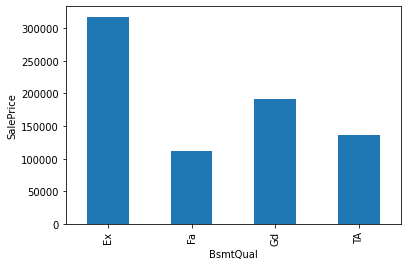

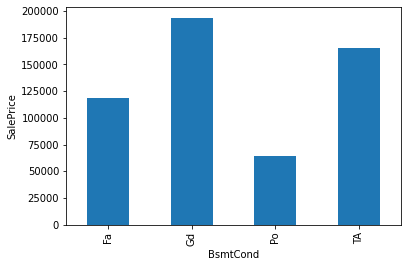

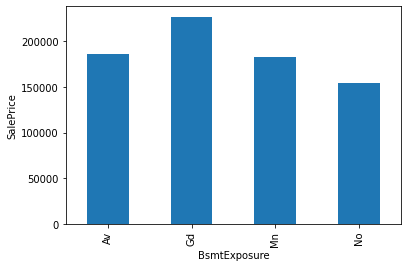

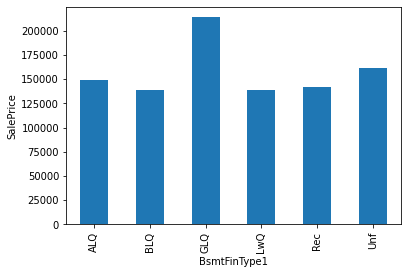

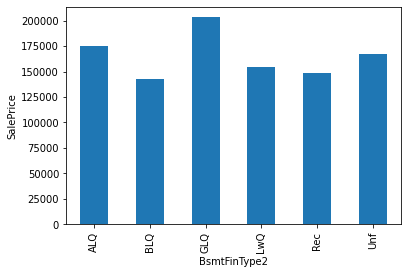

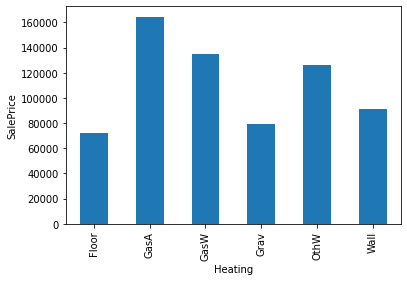

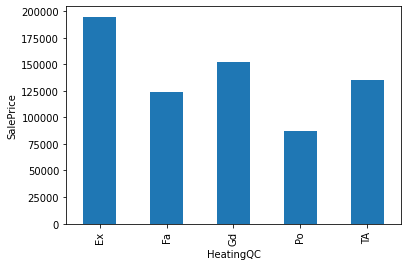

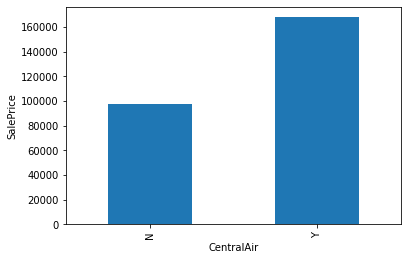

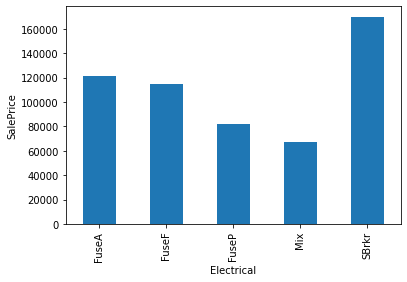

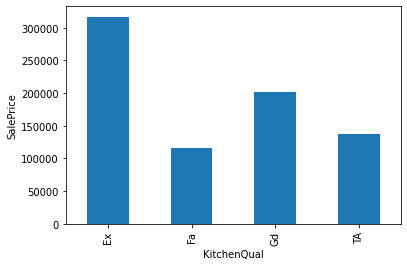

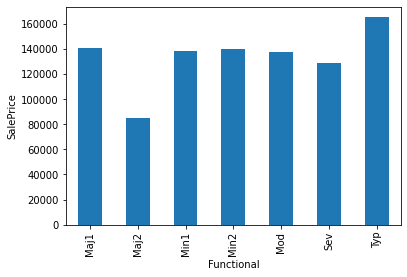

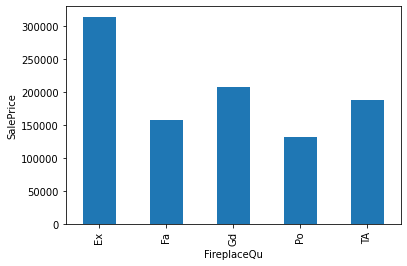

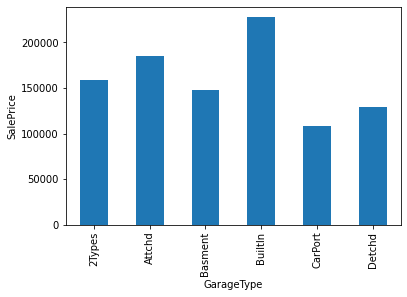

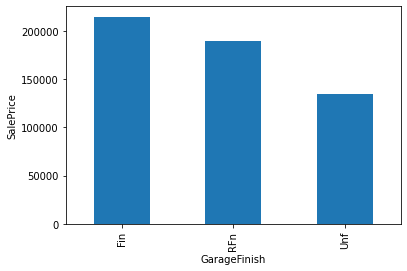

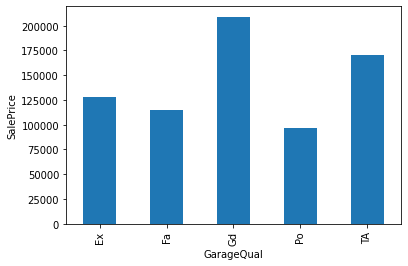

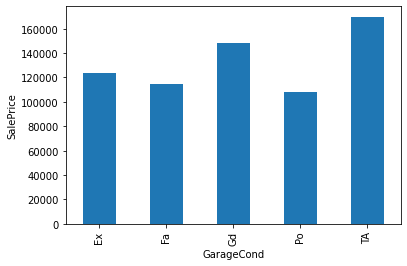

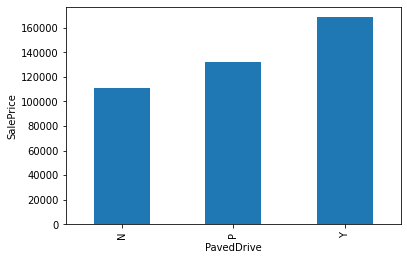

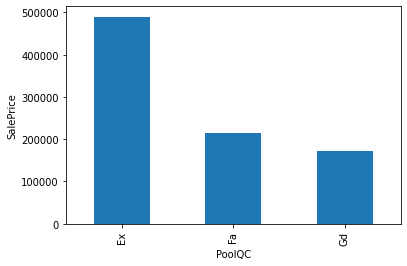

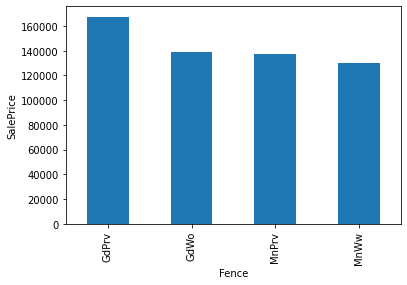

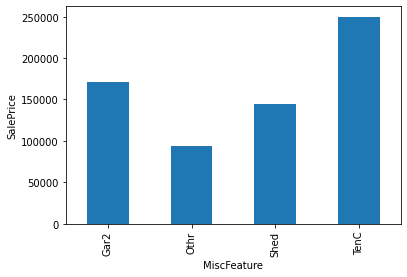

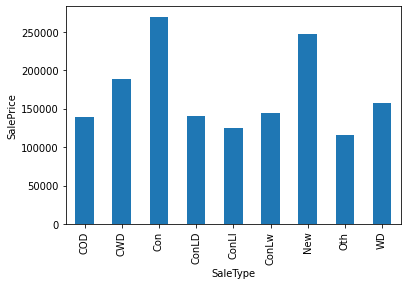

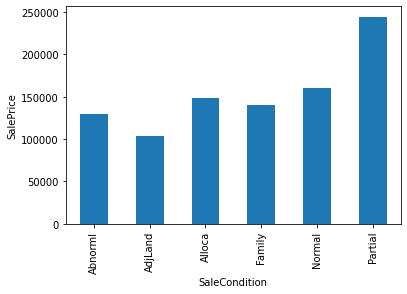

In [ ]:
# Rel between Categorical_features and SalePrice

for feature in categorical_features:
  data = df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

## Missing Values

In [ ]:
#First Lets handle categorical features which are missing
features_nan = [col for col in df.columns if df[col].isnull().sum()>0 and df[col].dtype=='O']
features_nan
for feature in features_nan:
  print(feature," : ",np.round(df[feature].isnull().mean(),4)*(100)," % missing values")

Alley  :  93.77  % missing values
MasVnrType  :  0.5499999999999999  % missing values
BsmtQual  :  2.53  % missing values
BsmtCond  :  2.53  % missing values
BsmtExposure  :  2.6  % missing values
BsmtFinType1  :  2.53  % missing values
BsmtFinType2  :  2.6  % missing values
Electrical  :  0.06999999999999999  % missing values
FireplaceQu  :  47.260000000000005  % missing values
GarageType  :  5.55  % missing values
GarageFinish  :  5.55  % missing values
GarageQual  :  5.55  % missing values
GarageCond  :  5.55  % missing values
PoolQC  :  99.52  % missing values
Fence  :  80.75  % missing values
MiscFeature  :  96.3  % missing values


In [ ]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
train_test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
pd.set_option('display.max_rows',None)
train_test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       518
LotArea             0
Street              0
Alley            2738
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         16
MasVnrArea         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           74
BsmtCond           74
BsmtExposure       76
BsmtFinType1       74
BsmtFinSF1          0
BsmtFinType2       76
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          2
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
#First Lets handle categorical features which are missing
features_nan_test = [col for col in train_test_df.columns if train_test_df[col].isnull().sum()>0 and train_test_df[col].dtype=='object']
features_nan_test
for feature in features_nan_test:
  print(feature," : ",np.round(train_test_df[feature].isnull().mean(),4)*(100)," % missing values")

Alley  :  93.77  % missing values
MasVnrType  :  0.5499999999999999  % missing values
BsmtQual  :  2.53  % missing values
BsmtCond  :  2.53  % missing values
BsmtExposure  :  2.6  % missing values
BsmtFinType1  :  2.53  % missing values
BsmtFinType2  :  2.6  % missing values
Electrical  :  0.06999999999999999  % missing values
FireplaceQu  :  47.260000000000005  % missing values
GarageType  :  5.55  % missing values
GarageFinish  :  5.55  % missing values
GarageQual  :  5.55  % missing values
GarageCond  :  5.55  % missing values
PoolQC  :  99.52  % missing values
Fence  :  80.75  % missing values
MiscFeature  :  96.3  % missing values


In [ ]:
pd.set_option('display.max_rows',None)
train_test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Replace missing value with a new label

def replace_cat_feature(dataset,features_nan_test):
  data = train_test_df.copy()
  data[features_nan_test] = data[features_nan_test].fillna('Missing') # whenever you are having nan values in categorical columns, make sure to replace that with new label so that missing value is handled and you get a new category
  return data

train_test_df = replace_cat_feature(train_test_df,features_nan_test)
train_test_df[features_nan_test].isnull().sum()
# pd.set_option('display.max_rows',None)
# train_test_df.isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
# Now Lets check for numerical values
numerical_nan_test = [col for col in train_test_df.columns if train_test_df[col].isnull().sum()>0 and train_test_df[col].dtype!='O']
numerical_nan_test
for feature in numerical_nan_test:
  print(feature," : ",np.round(train_test_df[feature].isnull().mean(),4)*(100)," % missing values")

LotFrontage  :  17.740000000000002  % missing values
MasVnrArea  :  0.5499999999999999  % missing values
GarageYrBlt  :  5.55  % missing values


In [ ]:
# Whenever we are having outliers as we can see in above boxplots , thus we will replace the missing values with median or mode, here we will be using median

for feature in numerical_nan_test:
  median_value = train_test_df[feature].median()
  #creating new features to capture nan values
  train_test_df[feature+"nan"] = np.where(train_test_df[feature].isnull(),1,0)
  train_test_df[feature].fillna(median_value,inplace=True)

train_test_df[numerical_nan_test].isnull().sum() 

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
train_test_df.shape

(2920, 84)

In [ ]:
train_test_df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,Mis

In [ ]:
# DateTime Variables : here we will try to convert year features into how many years with respect to yrsold
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  train_test_df[feature] = train_test_df['YrSold']-train_test_df[feature]



In [ ]:
train_test_df.shape

(2920, 84)

In [ ]:
train_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [ ]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0


In [ ]:
num_features_test = []
for feature in numeric_features:
    if 0 not in train_test_df[feature].unique() and feature not in year_cols+['Id','SalePrice']:
        num_features_test.append(feature)
num_features_test

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'MoSold']

In [ ]:
train_test_df[num_features_test].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,1stFlrSF,GrLivArea,TotRmsAbvGrd,MoSold
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1162.626712,1515.463699,6.517808,6.321918
std,42.293325,22.023904,9979.555080,1.382760,1.112609,386.521513,525.390365,1.625115,2.703163
min,20.000000,21.000000,1300.000000,1.000000,1.000000,334.000000,334.000000,2.000000,1.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,882.000000,1129.500000,5.000000,5.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1087.000000,1464.000000,6.000000,6.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,1391.250000,1776.750000,7.000000,8.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,4692.000000,5642.000000,14.000000,12.000000


In [ ]:
# Tranformation

# num_features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea'] # taking all those features which do not have 0 in their datas and also excluding the years columns
for feature in num_features_test:
  train_test_df[feature] = np.log1p(train_test_df[feature])
train_test_df.shape

(2920, 84)

In [ ]:
train_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,4.110874,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,1.791759,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.753438,854,0,7.444833,1,0,2,1,3,1,Gd,2.197225,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,1.098612,2008,WD,Normal,208500,0,0,0
1,2,3.044522,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.945910,2.197225,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.141245,0,0,7.141245,0,1,2,0,3,1,TA,1.945910,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,1.791759,2007,WD,Normal,181500,0,0,0
2,3,4.110874,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,1.791759,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.825460,866,0,7.488294,1,0,2,1,3,1,Gd,1.945910,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,2.302585,2008,WD,Normal,223500,0,0,0
3,4,4.262680,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.079442,1.791759,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.869014,756,0,7.448916,1,0,1,0,3,1,Gd,2.079442,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,1.098612,2006,WD,Abnorml,140000,0,0,0
4,5,4.110874,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.197225,1.791759,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.044033,1053,0,7.695758,1,0,2,1,4,1,Gd,2.302585,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,2.564949,2008,WD,Normal,250000,0,0,0


# Handling Rare Categorical Features

### We will remove categorical variables that are present less than 1% of the observations and convert them to a new label

In [ ]:
categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.groupby('Street')['Id'].count()/len(df)

Street
Grvl    0.00411
Pave    0.99589
Name: Id, dtype: float64

In [ ]:
# We will now see the the percentage of each categories for every categorical feature

for feature in categorical_features.columns:
  temp = train_test_df.groupby(feature)['Id'].count()/len(train_test_df)
  temp_df = temp[temp>0.01].index
  train_test_df[feature] = np.where(train_test_df[feature].isin(temp_df),train_test_df[feature],'Rare_var')
train_test_df.shape

(2920, 84)

In [ ]:
train_test_df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,4.110874,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,1.791759,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.753438,854,0,7.444833,1,0,2,1,3,1,Gd,2.197225,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,1.098612,2008,WD,Normal,208500,0,0,0
1,2,3.044522,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,1.945910,2.197225,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.141245,0,0,7.141245,0,1,2,0,3,1,TA,1.945910,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,1.791759,2007,WD,Normal,181500,0,0,0
2,3,4.110874,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,1.791759,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.825460,866,0,7.488294,1,0,2,1,3,1,Gd,1.945910,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,2.302585,2008,WD,Normal,223500,0,0,0
3,4,4.262680,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.079442,1.791759,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.869014,756,0,7.448916,1,0,1,0,3,1,Gd,2.079442,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,1.098612,2006,WD,Abnorml,140000,0,0,0
4,5,4.110874,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.197225,1.791759,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.044033,1053,0,7.695758,1,0,2,1,4,1,Gd,2.302585,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,2.564949,2008,WD,Normal,250000,0,0,0
5,6,3.931826,RL,4.454347,9.555064,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,1.791759,1.791759,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.680855,566,0,7.217443,1,0,1,1,1,1,TA,1.791759,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,2.397895,2009,WD,Normal,143000,0,0,0
6,7,3.044522,RL,4.330733,9.218804,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,2.197225,1.791759,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.435438,0,0,7.435438,1,0,2,0,3,1,Gd,2.079442,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,2.197225,2007,WD,Normal,307000,0,0,0
7,8,4.110874,RL,4.248495,9.247925,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,2.079442,1.945910,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.010312,983,0,7.645398,1,0,2,1,3,1,TA,2.079442,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,

In [ ]:
labels_ordered=df.groupby(['MSZoning'])['SalePrice'].mean().sort_values()
labels_ordered

MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         191004.994787
FV         214014.061538
Name: SalePrice, dtype: float64

In [ ]:
for i,k in enumerate(labels_ordered,0):
  print(i,k)

0 74528.0
1 126316.83027522935
2 131558.375
3 191004.99478714162
4 214014.06153846154


In [ ]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
labels_ordered=df.groupby(['Street'])['SalePrice'].mean().sort_values()
labels_ordered

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

In [ ]:
{k:i for i,k in enumerate(labels_ordered,0)}

{130190.5: 0, 181130.53851444292: 1}

In [ ]:
train_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,4.110874,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,1.791759,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.753438,854,0,7.444833,1,0,2,1,3,1,Gd,2.197225,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,1.098612,2008,WD,Normal,208500,0,0,0
1,2,3.044522,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,1.945910,2.197225,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.141245,0,0,7.141245,0,1,2,0,3,1,TA,1.945910,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,1.791759,2007,WD,Normal,181500,0,0,0
2,3,4.110874,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.079442,1.791759,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.825460,866,0,7.488294,1,0,2,1,3,1,Gd,1.945910,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,2.302585,2008,WD,Normal,223500,0,0,0
3,4,4.262680,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.079442,1.791759,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.869014,756,0,7.448916,1,0,1,0,3,1,Gd,2.079442,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,1.098612,2006,WD,Abnorml,140000,0,0,0
4,5,4.110874,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.197225,1.791759,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.044033,1053,0,7.695758,1,0,2,1,4,1,Gd,2.302585,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,2.564949,2008,WD,Normal,250000,0,0,0


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
train_test_df.iloc[0:1460,:].shape

(1460, 84)

In [ ]:
# Performing label encoding to all the categorical variables
for feature in categorical_features:
    labels_ordered=train_test_df.iloc[0:1460,:].groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_test_df[feature]=train_test_df[feature].map(labels_ordered)
train_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,4.110874,3,4.189655,9.042040,1,2,0,1,1,0,0,15,4,1,4,5,2.079442,1.791759,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.753438,854,0,7.444833,1,0,2,1,3,1,2,2.197225,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,1.098612,2008,2,3,208500,0,0,0
1,2,3.044522,3,4.394449,9.169623,1,2,0,1,1,1,0,12,1,1,4,4,1.945910,2.197225,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.141245,0,0,7.141245,0,1,2,0,3,1,1,1.945910,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,1.791759,2007,2,3,181500,0,0,0
2,3,4.110874,3,4.234107,9.328212,1,2,1,1,1,0,0,15,4,1,4,5,2.079442,1.791759,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.825460,866,0,7.488294,1,0,2,1,3,1,2,1.945910,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,2.302585,2008,2,3,223500,0,0,0
3,4,4.262680,3,4.110874,9.164401,1,2,1,1,1,2,0,16,4,1,4,5,2.079442,1.791759,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.869014,756,0,7.448916,1,0,1,0,3,1,2,2.079442,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,1.098612,2006,2,0,140000,0,0,0
4,5,4.110874,3,4.442651,9.565284,1,2,1,1,1,1,0,22,4,1,4,5,2.197225,1.791759,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.044033,1053,0,7.695758,1,0,2,1,4,1,2,2.302585,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,2.564949,2008,2,3,250000,0,0,0


In [ ]:
train_test_df.shape

(2920, 84)

In [ ]:
train_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,4.110874,3,4.189655,9.042040,1,2,0,1,1,0,0,15,4,1,4,5,2.079442,1.791759,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.753438,854,0,7.444833,1,0,2,1,3,1,2,2.197225,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,1.098612,2008,2,3,208500,0,0,0
1,2,3.044522,3,4.394449,9.169623,1,2,0,1,1,1,0,12,1,1,4,4,1.945910,2.197225,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.141245,0,0,7.141245,0,1,2,0,3,1,1,1.945910,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,1.791759,2007,2,3,181500,0,0,0
2,3,4.110874,3,4.234107,9.328212,1,2,1,1,1,0,0,15,4,1,4,5,2.079442,1.791759,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.825460,866,0,7.488294,1,0,2,1,3,1,2,1.945910,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,2.302585,2008,2,3,223500,0,0,0
3,4,4.262680,3,4.110874,9.164401,1,2,1,1,1,2,0,16,4,1,4,5,2.079442,1.791759,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.869014,756,0,7.448916,1,0,1,0,3,1,2,2.079442,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,1.098612,2006,2,0,140000,0,0,0
4,5,4.110874,3,4.442651,9.565284,1,2,1,1,1,1,0,22,4,1,4,5,2.197225,1.791759,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.044033,1053,0,7.695758,1,0,2,1,4,1,2,2.302585,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,2.564949,2008,2,3,250000,0,0,0


## Feature Scaling

In [ ]:
# feature_scale = [feature for feature in df.columns if feature not in ['Id','SalePrice']]
# print(feature_scale)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df[feature_scale])

In [ ]:
feature_scale_test = [feature for feature in train_test_df.columns if feature not in ['Id','SalePrice']]
print(feature_scale_test)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_test_df[feature_scale_test])

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

MinMaxScaler()

In [ ]:
df[['Id','SalePrice']].reset_index(drop=True).head()


,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [ ]:
train_test_df.shape

(2920, 84)

In [ ]:
# transform the train  set and add on the Id and SalePrice variables
train_test_df = pd.concat([train_test_df[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_test_df[feature_scale_test]),columns=feature_scale_test)],axis=1)
train_test_df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,208500,0.483003,0.75,0.413268,0.366271,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.813196,0.682606,0.036765,0.098361,0.0,0.0,0.9,0.9,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.355839,0.413559,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.682606,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.50,0.666667,0.75,0.0,0.0,0.0
1,181500,0.000000,0.75,0.490307,0.391245,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.734867,0.934536,0.227941,0.524590,0.0,0.0,0.1,0.2,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.526456,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.586928,0.25,0.666667,0.75,0.0,0.0,0.0
2,223500,0.483003,0.75,0.429990,0.422289,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.813196,0.682606,0.051471,0.114754,0.0,0.0,0.9,0.9,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383123,0.419370,0.0,0.592825,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.526456,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.859833,0.50,0.666667,0.75,0.0,0.0,0.0
3,140000,0.551764,0.75,0.383633,0.390223,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.813196,0.682606,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399623,0.366102,0.0,0.578882,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.609423,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.00,0.666667,0.00,0.0,0.0,0.0
4,250000,0.483003,0.75,0.508439,0.468694,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.882287,0.682606,0.058824,0.147541,0.0,0.0,0.9,0.9,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.465926,0.509927,0.0,0.666289,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.748070,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_test_df.to_csv('X_train.csv',index=False)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature Selection

### Correlation Matrix

In [ ]:
corr = train_test_df.corr()
corr

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
SalePrice,1.000000,-0.034217,0.324610,0.332477,0.388528,0.041036,0.139868,0.265699,0.158437,0.014314,0.122882,0.051152,0.695265,0.159087,0.030676,0.176025,0.260616,0.747192,-0.053177,-0.523350,-0.509079,0.234134,0.104505,0.357866,0.365201,0.428304,0.472614,0.682639,0.122671,0.500710,0.622925,0.220289,0.374696,0.380964,0.386420,0.164611,-0.011378,0.214479,0.613581,0.111597,0.427649,0.251328,0.231149,0.591299,0.319334,-0.025606,0.695147,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.659600,0.522355,0.119101,0.466929,0.525932,0.486408,-0.467617,0.549247,0.640409,0.623431,0.270864,0.279024,0.231357,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,0.093708,0.185559,0.071953,-0.021190,0.036277,-0.028923,0.275561,0.234955,0.004087,0.051933,-0.236832
MSSubClass,-0.034217,1.000000,-0.205550,-0.391942,-0.378062,-0.013758,-0.119328,-0.068897,-0.033013,0.029458,-0.049695,-0.025517,-0.009377,-0.005558,-0.045152,-0.582023,-0.044477,0.090237,-0.035970,0.001683,-0.041549,-0.177996,-0.023796,-0.013468,-0.003143,-0.019282,0.032799,0.038996,0.001121,0.060033,0.064890,-0.003871,0.042154,0.153525,-0.112966,0.058522,-0.089857,-0.132039,-0.283476,-0.050087,-0.002898,-0.102008,0.013816,-0.319266,0.480402,0.065944,0.197078,-0.040138,0.005405,0.181546,0.287581,0.065690,0.257244,0.009386,0.131738,0.006247,0.005168,0.015235,-0.080280,-0.064510,-0.004920,-0.010493,-0.078472,-0.047976,-0.068026,-0.069972,-0.001073,0.028228,0.024751,-0.046489,-0.014032,0.024056,0.025436,0.110620,0.041365,-0.012200,0.018295,-0.027520,-0.015325,-0.028653,-0.004288,-0.016772,0.063328
MSZoning,0.324610,-0.205550,1.000000,0.315051,0.321026,0.084606,0.221947,0.187166,0.045657,-0.009400,0.079673,0.006208,0.520549,0.125679,0.091497,0.159184,0.230480,0.271024,-0.118942,-0.460736,-0.240519,0.054911,0.035325,0.179354,0.184405,0.148044,0.125409,0.274595,0.143167,0.284754,0.243081,0.087253,0.086154,0.053950,0.170059,-0.047105,0.035922,0.046960,0.237309,0.099890,0.199776,0.254369,0.177141,0.270212,-0.007883,-0.105732,0.192940,0.120119,0.025223,0.266772,0.168978,0.105903,-0.111713,0.247010,0.142798,0.076099,0.170517,0.169354,0.342100,-0.309747,0.285038,0.253433,0.255667,0.176361,0.191037,0.289688,0.125597,0.092446,-0.224789,0.032781,0.024213,0.024663,0.024921,0.045851,0.020284,0.000786,-0.008552,0.010486,0.132537,0.127570,0.092355,0.061642,-0.138661
LotFrontage,0.332477,-0.391942,0.315051,1.000000,0.652386,-0.034418,0.146183,0.136212,0.041084,-0.002836,0.088399,0.060009,0.234484,-0.056957,-0.024840,0.297897,0.077355,0.191125,-0.027260,-0.087258,-0.059033,0.173380,0.098481,0.066664,0.056737,0.088276,0.141366,0.144618,0.035635,0.075252,0.115432,0.034302,0.133306,0.007708,0.166679,-0.020610,0.038646,0.140640,0.329151,0.010275,0.085468,0.053500,0.043893,0.422361,0.046953,0.024742,0.321113,0.066453,-0.002614,0.163491,0.016911,0.267495,0.013516,0.144220,0.329321,0.031083,0.224459,0.217211,0.266582,-0.039330,0.217755,0.273091,0.317798,0.118524,0.118720,0.078597,0.088192,0.123286,0.017847,0.063673,0.050937,0.108413,0.121485,-0.053343,-0.028170,0.011067,0.008492,0.004429,0.082745,0.065252,0.050303,0.0

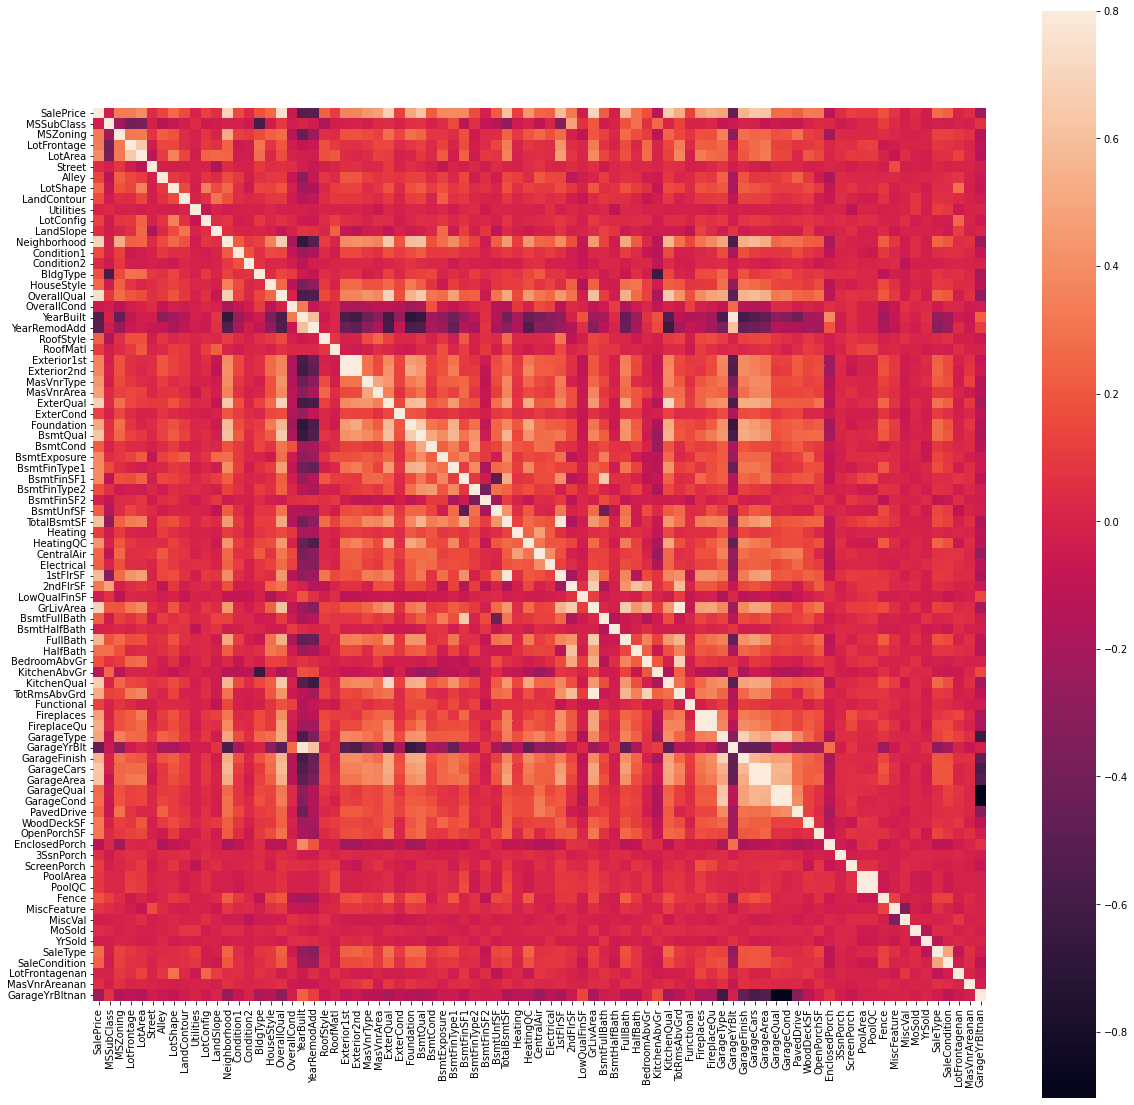

In [ ]:
#correlation matrix
corr = train_test_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, square=True);

In [ ]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i,j])>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_feat = correlation(train_test_df,0.8)
corr_feat

{'Exterior2nd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond',
 'GarageYrBltnan',
 'PoolQC',
 'TotRmsAbvGrd'}

In [ ]:
train_test_df.shape

(2920, 83)

In [ ]:
train_test_df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,208500,0.483003,0.75,0.413268,0.366271,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.813196,0.682606,0.036765,0.098361,0.0,0.0,0.9,0.9,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.355839,0.413559,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.682606,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.50,0.666667,0.75,0.0,0.0,0.0
1,181500,0.000000,0.75,0.490307,0.391245,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.734867,0.934536,0.227941,0.524590,0.0,0.0,0.1,0.2,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.526456,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.586928,0.25,0.666667,0.75,0.0,0.0,0.0
2,223500,0.483003,0.75,0.429990,0.422289,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.813196,0.682606,0.051471,0.114754,0.0,0.0,0.9,0.9,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383123,0.419370,0.0,0.592825,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.526456,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.859833,0.50,0.666667,0.75,0.0,0.0,0.0
3,140000,0.551764,0.75,0.383633,0.390223,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.813196,0.682606,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399623,0.366102,0.0,0.578882,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.609423,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.00,0.666667,0.00,0.0,0.0,0.0
4,250000,0.483003,0.75,0.508439,0.468694,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.882287,0.682606,0.058824,0.147541,0.0,0.0,0.9,0.9,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.465926,0.509927,0.0,0.666289,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.748070,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [ ]:
# train_test_df = train_test_df.drop(train_test_df[(train_test_df['GrLivArea']>4000) & (train_test_df['SalePrice']<300000)].index)

In [ ]:
t = train_test_df.drop(['SalePrice'],axis=1)
t.loc[0:1460,:].columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
train_test_df[['SalePrice']].loc[0:1460,:].columns

Index(['SalePrice'], dtype='object')

In [ ]:
train_test_df.shape

(2920, 83)

In [ ]:
y_train = train_test_df[['SalePrice']].loc[0:1460,:]
X_train = train_test_df.drop(['SalePrice'],axis=1).loc[0:1460,:]
X_test = train_test_df.drop(['SalePrice'],axis=1).loc[1460:2919,:]

In [ ]:
X_train.shape

(1461, 82)

In [ ]:
y_train.shape

(1461, 1)

In [ ]:
X_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [ ]:
X_train.shape
X_train = X_train.drop(corr_feat,axis=1)
X_train.shape

(1461, 75)

In [ ]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan
0,0.483003,0.75,0.413268,0.366271,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.813196,0.682606,0.036765,0.098361,0.0,0.0,0.9,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.355839,0.413559,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,1.0,0.000000,0.8,0.046729,0.666667,0.50,0.666667,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.50,0.666667,0.75,0.0,0.0
1,0.000000,0.75,0.490307,0.391245,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.734867,0.934536,0.227941,0.524590,0.0,0.0,0.1,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,1.0,0.333333,0.8,0.289720,0.666667,0.50,0.666667,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.586928,0.25,0.666667,0.75,0.0,0.0
2,0.483003,0.75,0.429990,0.422289,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.813196,0.682606,0.051471,0.114754,0.0,0.0,0.9,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383123,0.419370,0.0,0.592825,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,1.0,0.333333,0.8,0.065421,0.666667,0.50,0.666667,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.859833,0.50,0.666667,0.75,0.0,0.0
3,0.551764,0.75,0.383633,0.390223,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.813196,0.682606,0.669118,0.606557,0.0,0.0,0.2,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399623,0.366102,0.0,0.578882,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,1.0,0.333333,0.4,0.074766,0.333333,0.75,0.666667,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.00,0.666667,0.00,0.0,0.0
4,0.483003,0.75,0.508439,0.468694,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.882287,0.682606,0.058824,0.147541,0.0,0.0,0.9,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.465926,0.509927,0.0,0.666289,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,1.0,0.333333,0.8,0.074766,0.666667,0.75,0.666667,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0


In [ ]:
# X_train.SalePricenan.unique()

In [ ]:
X_test = X_test.drop(corr_feat,axis=1)

In [ ]:
X_train.shape

(1461, 75)

In [ ]:
X_test.shape

(1460, 75)

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan
0,0.483003,0.75,0.413268,0.366271,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.813196,0.682606,0.036765,0.098361,0.0,0.0,0.9,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.355839,0.413559,0.0,0.577436,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,1.0,0.000000,0.8,0.046729,0.666667,0.50,0.666667,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.50,0.666667,0.75,0.0,0.0
1,0.000000,0.75,0.490307,0.391245,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.734867,0.934536,0.227941,0.524590,0.0,0.0,0.1,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.502753,0.000000,0.0,0.469935,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,1.0,0.333333,0.8,0.289720,0.666667,0.50,0.666667,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.586928,0.25,0.666667,0.75,0.0,0.0
2,0.483003,0.75,0.429990,0.422289,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.813196,0.682606,0.051471,0.114754,0.0,0.0,0.9,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383123,0.419370,0.0,0.592825,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,1.0,0.333333,0.8,0.065421,0.666667,0.50,0.666667,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.859833,0.50,0.666667,0.75,0.0,0.0
3,0.551764,0.75,0.383633,0.390223,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.813196,0.682606,0.669118,0.606557,0.0,0.0,0.2,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399623,0.366102,0.0,0.578882,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,1.0,0.333333,0.4,0.074766,0.333333,0.75,0.666667,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,0.0,0.216618,0.00,0.666667,0.00,0.0,0.0
4,0.483003,0.75,0.508439,0.468694,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.882287,0.682606,0.058824,0.147541,0.0,0.0,0.9,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.465926,0.509927,0.0,0.666289,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,1.0,0.333333,0.8,0.074766,0.666667,0.75,0.666667,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0


In [ ]:
X_train=X_train.drop(['YrSold','PoolArea','LandSlope','MoSold'],axis=1)
X_test = X_test.drop(['YrSold','PoolArea','LandSlope','MoSold'],axis=1)

In [ ]:
X_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,0.350796,0.678645,0.422590,0.379754,0.995893,0.951745,0.143053,0.349989,0.999316,0.164442,0.492689,0.732375,0.989733,0.917864,0.759617,0.731637,0.730731,0.268576,0.392422,0.207050,0.017796,0.588980,0.392197,0.064488,0.465435,0.913301,0.690110,0.628679,0.739733,0.407426,0.706708,0.078636,0.769108,0.031559,0.242703,0.173043,0.984257,0.786448,0.934976,0.962811,0.452381,0.168203,0.010211,0.515043,0.141912,0.028747,0.521789,0.191650,0.358316,0.348848,0.503993,0.955681,0.204198,0.652977,0.272992,0.571983,0.441821,0.623317,0.928131,0.109895,0.085320,0.039745,0.006707,0.031356,0.900924,0.964750,0.002804,0.668492,0.709959,0.177276,0.005476
std,0.311702,0.198882,0.118227,0.101239,0.063974,0.197325,0.217904,0.149925,0.026162,0.293106,0.267983,0.201295,0.100839,0.216239,0.264908,0.118461,0.104605,0.222434,0.338343,0.398299,0.132255,0.328063,0.224022,0.112929,0.191434,0.237498,0.292468,0.196168,0.108211,0.266788,0.291844,0.080793,0.191329,0.109409,0.189148,0.071782,0.111460,0.239858,0.246653,0.131961,0.120238,0.211419,0.084977,0.117994,0.172984,0.119338,0.183615,0.251486,0.101938,0.073422,0.221218,0.175450,0.214882,0.250834,0.224626,0.297519,0.186771,0.167189,0.248218,0.146231,0.121087,0.110690,0.057692,0.116124,0.218919,0.182138,0.031997,0.156531,0.216261,0.382033,0.073820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.750000,0.383633,0.344437,1.000000,1.000000,0.000000,0.333333,1.000000,0.000000,0.272727,0.800000,1.000000,1.000000,0.800000,0.644443,0.682606,0.058824,0.081967,0.000000,0.000000,0.200000,0.250000,0.000000,0.333333,1.000000,0.500000,0.500000,0.750000,0.250000,0.500000,0.000000,0.833333,0.000000,0.095462,0.130278,1.000000,0.500000,1.000000,1.000000,0.367161,0.000000,0.000000,0.430846,0.000000,0.000000,0.333333,0.000000,0.2

In [ ]:
y_train.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [ ]:
X_train.shape

(1461, 71)

In [ ]:
y_train.shape

(1461, 1)

In [ ]:
def RMSE_loss(targets,prediction): # targets and predictions should be DataFrame Objects
  return (((targets.values-prediction.values)**2).mean())**(0.5)

In [ ]:
from sklearn.model_selection import train_test_split
X_training,X_testing,y_training,y_testing = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [ ]:
X_training.shape

(1168, 71)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

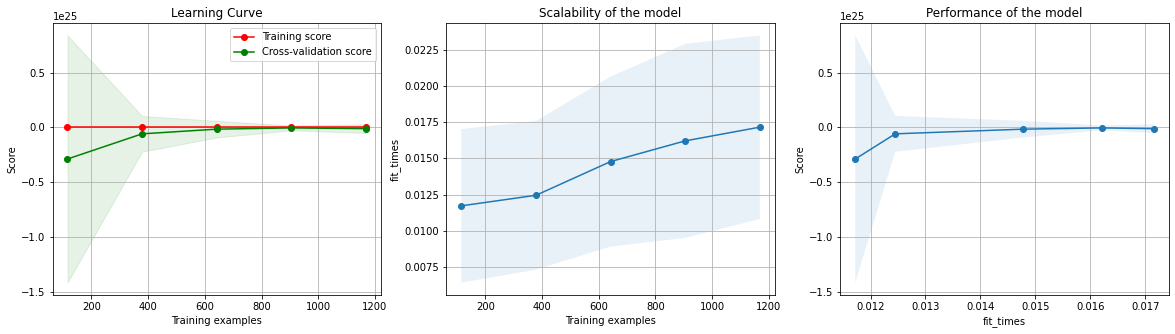

In [ ]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(
    estimator,"Learning Curve", X_train, y_train,cv=cv)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
predictions = model.predict(X_train)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
predictions_df = pd.DataFrame(predictions,columns=['Predictions'])
predictions_df.head()

,Predictions
0,216207.480733
1,193075.808297
2,232996.729717
3,187858.279897
4,304496.359682


In [ ]:
y_train.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [ ]:
(((y_train.values-predictions_df.values)**2).mean())**(0.5)

30957.136967787843

In [ ]:
loss = RMSE_loss(y_train,predictions_df)
loss

30957.136967787843

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, predictions_df)

0.8479540637809639

In [ ]:
# X_training,X_testing,y_training,y_testing = train_test_split(X_train,y_train,0.1,random_state=0)

In [ ]:
def error_plot(test_sizes):
    X_training,X_testing,y_training,y_testing = train_test_split(X_train,y_train,test_size = test_sizes,random_state=0)
    model = LinearRegression()
    model.fit(X_training,y_training)
    train_pred = model.predict(X_training)
    train_pred_df = pd.DataFrame(train_pred,columns=['train_Pred'])
    test_pred = model.predict(X_testing)
    test_pred_df = pd.DataFrame(test_pred,columns=['test_Pred'])
    train_error = RMSE_loss(y_training,train_pred_df)
    test_error = RMSE_loss(y_testing,test_pred_df)
    train_score = r2_score(y_training,train_pred_df)
    test_score = r2_score(y_testing,test_pred_df)
    return {'Test_sizes':X_training.shape[0], 'Train_error':train_error,'Test_error':test_error,'Train_score':train_score,'Test_score':test_score}


In [ ]:
np.linspace(0.01,0.5,20)

array([0.01      , 0.03578947, 0.06157895, 0.08736842, 0.11315789,
       0.13894737, 0.16473684, 0.19052632, 0.21631579, 0.24210526,
       0.26789474, 0.29368421, 0.31947368, 0.34526316, 0.37105263,
       0.39684211, 0.42263158, 0.44842105, 0.47421053, 0.5       ])

In [ ]:
%%time
error_df = pd.DataFrame([error_plot(test_sizes) for test_sizes in np.linspace(0.1,0.5,100)])

CPU times: user 3.36 s, sys: 3.98 s, total: 7.34 s
Wall time: 3.82 s


In [ ]:
error_df.head()

,Test_sizes,Train_error,Test_error,Train_score,Test_score
0,1314,30981.734425,32157.824572,0.847449,0.838161
1,1308,30950.196190,32068.370954,0.847812,0.838398
2,1303,31177.510232,32430.541803,0.845159,0.837942
3,1297,31043.444682,32044.869571,0.846710,0.840203
4,1291,31011.487878,31579.307256,0.847148,0.843831


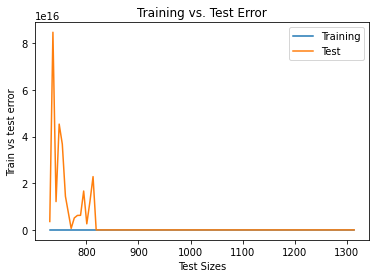

In [ ]:
plt.figure()
plt.plot(error_df['Test_sizes'], error_df['Train_error'])
plt.plot(error_df['Test_sizes'], error_df['Test_error'])
plt.title('Training vs. Test Error')
plt.xlabel('Test Sizes')
plt.ylabel('Train vs test error')
plt.legend(['Training', 'Test'])

In [ ]:
# X_training,X_testing,y_training,y_testing = train_test_split(X_train,y_train,test_size = 0.2,random_state=42)
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=740,max_depth=20,max_leaf_nodes=2**10,max_features='sqrt',min_impurity_decrease=1e-7,bootstrap=False)
# regr.fit(X_training,y_training)
# train_p = regr.predict(X_training)
# train_p_df = pd.DataFrame(train_p,columns=['Train_P'])
# test_p = regr.predict(X_testing)
# test_p_df = pd.DataFrame(test_p,columns=['Test_P'])
# train_loss = RMSE_loss(y_training,train_p_df)
# test_loss = RMSE_loss(y_testing,test_p_df)
# train_scores = r2_score(y_training,train_p_df)
# test_scores = r2_score(y_testing,test_p_df)
# print("train_loss :",train_loss)
# print("test_loss :",test_loss)
# print("train_scores :",train_scores)
# print("test_scores :",test_scores)

In [ ]:
# len(regr.estimators_)

In [ ]:
# X_testing.shape

In [ ]:
# X_training.shape

In [ ]:
X_training,X_testing,y_training,y_testing = train_test_split(X_train,y_train,test_size = 0.2,random_state=42)
from xgboost import XGBRegressor
xg = XGBRegressor(random_state=42,n_jobs=-1,n_estimators=30,learning_rate=0.3,subsample=0.85,booster='gbtree')
xg.fit(X_training,y_training)
train_p = xg.predict(X_training)
train_p_df = pd.DataFrame(train_p,columns=['Train_P'])
test_p = xg.predict(X_testing)
test_p_df = pd.DataFrame(test_p,columns=['Test_P'])
train_loss = RMSE_loss(y_training,train_p_df)
test_loss = RMSE_loss(y_testing,test_p_df)
train_scores = r2_score(y_training,train_p_df)
test_scores = r2_score(y_testing,test_p_df)
print("train_loss :",train_loss)
print("test_loss :",test_loss)
print("train_scores :",train_scores)
print("test_scores :",test_scores)

[10:35:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train_loss : 15272.23621395494
test_loss : 27303.14889661534
train_scores : 0.9608920623273429
test_scores : 0.9025290547869405


# Handling Test Data

In [ ]:
X_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscFeature',

In [ ]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscFeature',

In [ ]:
# predictions_test = model.predict(X_test)
# predictions_test

In [ ]:
# predictions_test = regr.predict(X_test)

In [ ]:
predictions_test = xg.predict(X_test)

In [ ]:
predictions_test_df = pd.DataFrame(predictions_test,columns=['SalePrice'])
predictions_test_df.head()

,SalePrice
0,197866.453125
1,168830.546875
2,202181.296875
3,177865.750000
4,285903.093750


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
predictions_test_df = pd.concat([df_test.Id,predictions_test_df],axis=1)

In [ ]:
predictions_test_df.head()

,Id,SalePrice
0,1,197866.453125
1,2,168830.546875
2,3,202181.296875
3,4,177865.750000
4,5,285903.093750


In [ ]:
predictions_test_df.head()

,Id,SalePrice
0,1,197866.453125
1,2,168830.546875
2,3,202181.296875
3,4,177865.750000
4,5,285903.093750


In [ ]:
predictions_test_df.to_csv('submission13.csv',index=False)

In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
# df_test.head()

In [ ]:
# df_test.isnull().sum()

In [ ]:
# # Missing Values
# # Replace missing value with a new label

# features_nan = [col for col in df_test.columns if df_test[col].isnull().sum()>0 and df_test[col].dtype=='O']
# df_test = replace_cat_feature(df_test,features_nan)
# df_test[features_nan].isnull().sum()

In [ ]:
# numerical_nan = [col for col in df_test.columns if df_test[col].isnull().sum()>0 and df_test[col].dtype!='O']
# for feature in numerical_nan:
#   median_value = df_test[feature].median()
#   #creating new features to capture nan values
#   df_test[feature+"nan"] = np.where(df_test[feature].isnull(),1,0)
#   df_test[feature].fillna(median_value,inplace=True)

# df_test[numerical_nan].isnull().sum() 

In [ ]:
# # DateTime Variables : here we will try to convert year features into how many years with respect to yrsold
# for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
#   df_test[feature] = df_test['YrSold']-df_test[feature]



In [ ]:
# for feature in df_test.columns:
#   data = df_test.copy()
#   if 0 in data[feature].unique():
#     print(feature)

In [ ]:
# # Tranformation
# num_features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea'] # taking all those features which do not have 0 in their datas and also excluding the years columns
# for feature in num_features:
#   df[feature] = np.log(df[feature])
